## Metody Nieparametryczne w Statystyce
# Zadanie 12
Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa-Smirnowa w przypadku, gdy rozważane próbki danych pochodzą w rozkładów normalnych o tym samym odchyleniu standardowym, ale różniących się wartościami oczekiwanymi. Rozważyć różne wartości odchyleń standardowych.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [1]:
import numpy as np, pandas as pd
from scipy.stats import norm, kstest
from tqdm import tqdm

2. Badanie mocy testu Kolmogorova-Smirnova dla danych z rozkładów normalnych o stałym odchyleniu standardowym, ale różnych wartościach oczekiwanych.

W tej symulacji przeprowadzonych zostanie 1000 badań dla każdego z rozkładów o kombinacji mu z zakresu [-10, 10] oraz sigma ze zbioru {1, 2, 5, 8} i innego rozkładu dla stałego mu = 0 i sigma ze zbioru {1, 2, 5, 8}. Oczekiwany rezultat badania - moc testu najwyższa w otoczeniu mu = 0 dla pierwszego przedziału. Odchylenie standardowe będzie wpływało na stromiznę opadania krzywej mocy testu.

100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


<Axes: xlabel='mean', ylabel='statistical power'>

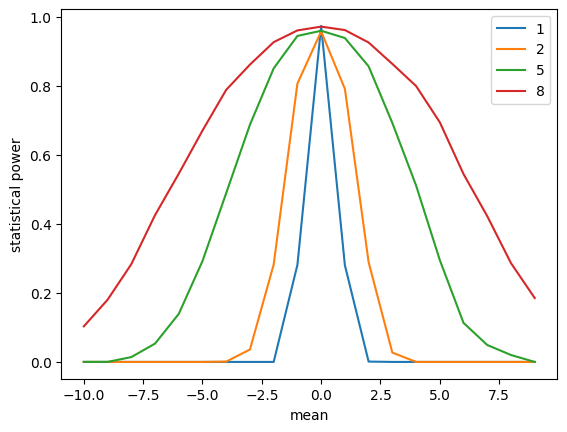

In [8]:
results = pd.DataFrame(columns=["1", "2", "5", "8"])
buf = []

for mu in tqdm(range (-10, 10)):
    for i in range (0, 1000):
        for sigma in [1, 2, 5, 8]:
            #generowanie dwóch wektorów liczbowych o rozkładzie normalnym o średniej m i różnych odchyleniach standardowych
            x1 = norm.rvs(0, sigma, size=20)
            x2 = norm.rvs(mu, sigma, size=20)
            
            #test kolmogorova-smirnova
            buf.append(kstest(x1, x2)[1] > .05)

    results.loc[mu] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()
results.plot(xlabel="mean", ylabel="statistical power")

Zgodnie z założeniami, moc testu słabnie kiedy mu pierwszego rozkładu oddala się od zera.